**Experiment 7: Implemant K-means Clustering from Scratch.**

**Objective**

The goal of this assignment is to implement the K-Means clustering algorithm from
scratch using NumPy, apply it to a customer segmentation dataset, and interpret the
clusters formed.

**1. Dataset and Setup**

• Use a customer dataset containing features such as Age, Annual Income (k$), and
Spending Score (1-100).
• Perform basic data exploration and preprocessing:
– Handle missing values if any.
– Normalize or standardize the numerical features (justify your choice).

– Provide relevant summary statistics and visualizations(distribution plots (his-
tograms, scatter matrix) of features.).

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [9]:
data = pd.read_csv('/Mall_Customers.xls')
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [10]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
features_df = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [14]:
print(features_df)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [15]:
features_df = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(features_df)

print("--- Original Data Head ---")
print(features_df.head())

print("\n--- Scaled Data Head (NumPy Array) ---")
print(X_scaled[:5])

print(f"\nNew Mean: {X_scaled.mean(axis=0)}")
print(f"New Std Dev: {X_scaled.std(axis=0)}")

--- Original Data Head ---
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

--- Scaled Data Head (NumPy Array) ---
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]

New Mean: [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16]
New Std Dev: [1. 1. 1.]


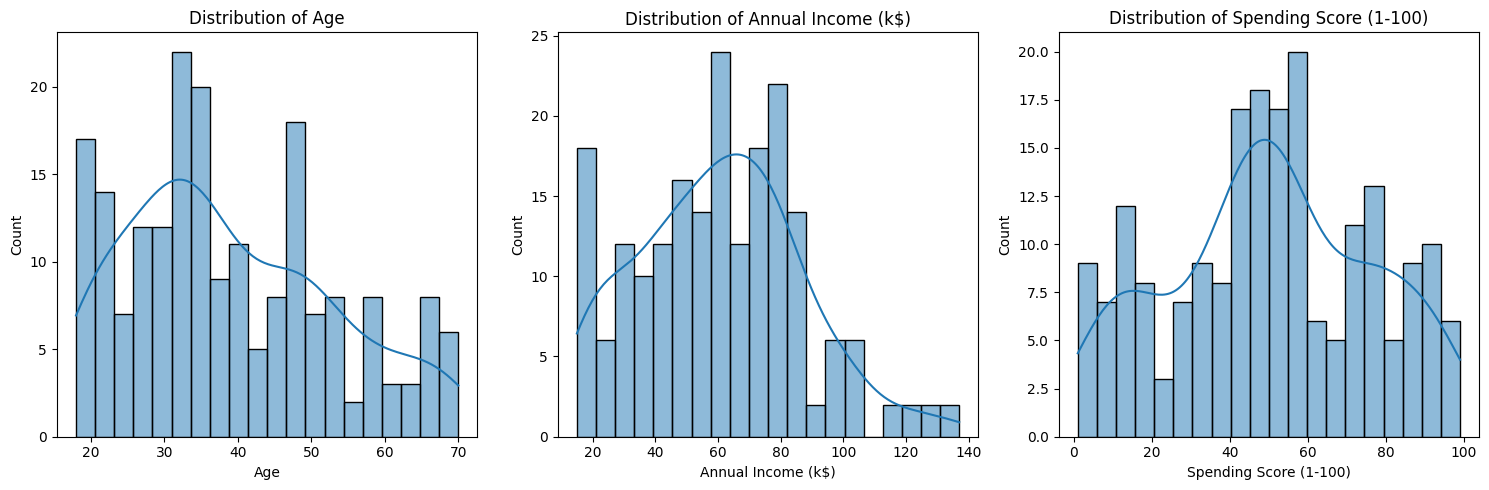


--- Scatter Matrix ---


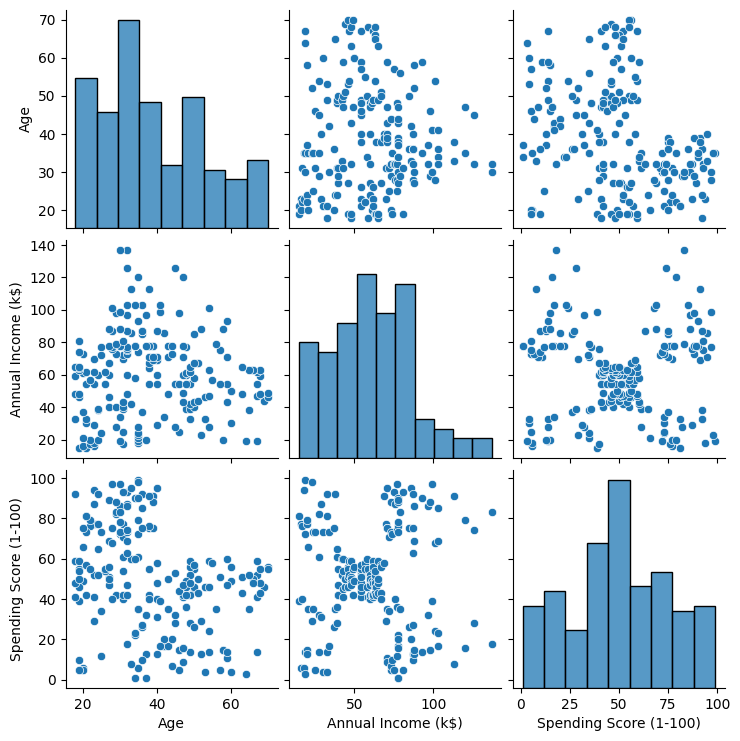

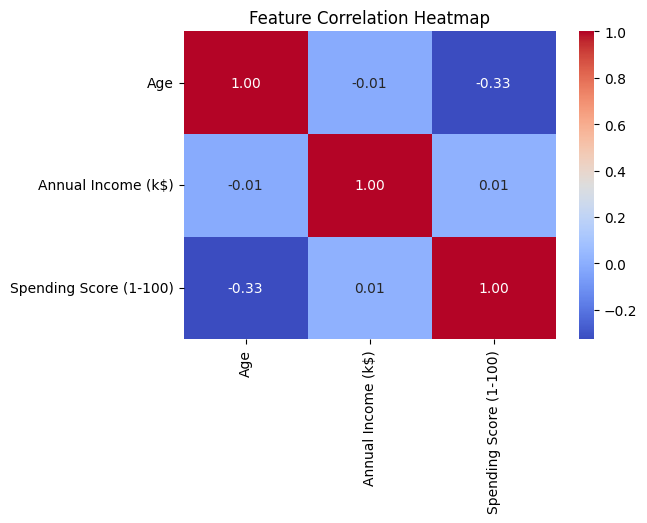

In [17]:

plt.figure(figsize=(15, 5))

# Plot for Age
plt.subplot(1, 3, 1)
sns.histplot(features_df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')

# Plot for Annual Income
plt.subplot(1, 3, 2)
sns.histplot(features_df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income (k$)')

# Plot for Spending Score
plt.subplot(1, 3, 3)
sns.histplot(features_df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribution of Spending Score (1-100)')

plt.tight_layout()
plt.show()


# --- Scatter Matrix (Pairplot) ---
# Shows relationships between all pairs of features
print("\n--- Scatter Matrix ---")
sns.pairplot(features_df)
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

**2. Tasks**

**2.1. Part A:** Implementing K-Means from Scratch
Write your own functions for each step of the K-Means algorithm using NumPy only
(no scikit-learn).
1. Initialization

• Write a function initialize centroids(X, k, random state=None) that
randomly selects k points as initial centroids.

• Implement the K-Means++ initialization scheme:

1.1. Choose one centroid uniformly at random from the data points.

1.2. For each data point x, compute the squared distance D(x) to the nearest
chosen centroid.

1.3. Choose the next centroid with probability proportional to D(x).

1.4. Repeat until k centroids are chosen.
Compare convergence speed and quality with random initialization.


2. Cluster Assignment
• Implement assign clusters(X, centroids) that assigns each data point to
the nearest centroid (using Euclidean distance).

3. Centroid Update
• Implement update centroids(X, labels, k) that recalculates the centroids
as the mean of all points belonging to each cluster.

4. Main Algorithm Loop
• Combine the above steps in a function kmeans(X, k, max iters=100, tol=1e-4,
random state=None).

• The algorithm should stop when:
– The centroid positions change less than tol (tolerance), or
– The maximum number of iterations is reached.

• The function should return:
– Final centroids
– Cluster labels
– Number of iterations
– Inertia (sum of squared distances to centroids)

In [18]:
def initialize_kmeans_plus_plus(X, k, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))

    first_centroid_idx = np.random.randint(n_samples)
    centroids[0] = X[first_centroid_idx]

    D_x_squared = np.full(n_samples, np.inf)

    for i in range(1, k):
        dist_to_newest_centroid_sq = np.linalg.norm(X - centroids[i-1], axis=1)**2

        D_x_squared = np.minimum(D_x_squared, dist_to_newest_centroid_sq)

        probabilities = D_x_squared / np.sum(D_x_squared)

        probabilities = probabilities / np.sum(probabilities)

        next_centroid_idx = np.random.choice(n_samples, p=probabilities)

        centroids[i] = X[next_centroid_idx]

    return centroids

In [19]:
def assign_clusters(X, centroids) :
    n_samples = X.shape[0]
    k = centroids.shape[0]
    distances = np.zeros((n_samples, k))

    for i in range(k):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)

    labels = np.argmin(distances, axis=1)

    return labels

In [20]:
def update_centroids(X, labels, k):
    n_features = X.shape[1]
    new_centroids = np.zeros((k, n_features))
    for i in range(k):
        points_in_cluster = X[labels == i]

        if len(points_in_cluster) > 0:
            new_centroids[i] = np.mean(points_in_cluster, axis=0)

    return new_centroids

In [21]:
def kmeans(X, k, max_iters=100, tol=1e-4, random_state=None):
    centroids = initialize_kmeans_plus_plus(X, k, random_state)

    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        centroid_change = np.linalg.norm(centroids - old_centroids)

        if centroid_change < tol:
            break
    labels = assign_clusters(X, centroids)
    inertia = 0
    for i in range(k):
        points_in_cluster = X[labels == i]
        if len(points_in_cluster) > 0:
            inertia += np.sum(np.linalg.norm(points_in_cluster - centroids[i], axis=1)**2)
    iterations = i + 1

    return centroids, labels, iterations, inertia

In [22]:
k_test = 5

final_centroids, final_labels, num_iters, final_inertia = kmeans(X_scaled, k=k_test, random_state=42)

print(f"--- K-Means (k={k_test}) ---")
print(f"Converged in {num_iters} iterations")
print(f"Final Inertia: {final_inertia}")
print("\nFinal Centroids:\n", final_centroids)

--- K-Means (k=5) ---
Converged in 5 iterations
Final Inertia: 168.76178846797762

Final Centroids:
 [[ 1.19862745 -0.46098141 -0.32703818]
 [-0.44191719  0.99158305  1.23950275]
 [-0.97439592 -1.32954532  1.13217788]
 [ 0.17329545  1.06645385 -1.2980103 ]
 [-0.78172248 -0.40306917 -0.21591396]]


**2.2. Part B**:

Choosing the Number of Clusters

• Use the Elbow Method and the Silhouette Score to determine an appropriate
k.

Compare both

• Plot inertia vs. k and justify your chosen value.

Running K-Means for k=2 to 10...
Finished k=2, Inertia=389.39, Silhouette Score=0.335
Finished k=3, Inertia=296.08, Silhouette Score=0.355
Finished k=4, Inertia=205.23, Silhouette Score=0.404
Finished k=5, Inertia=168.76, Silhouette Score=0.410
Finished k=6, Inertia=133.87, Silhouette Score=0.427
Finished k=7, Inertia=117.01, Silhouette Score=0.417
Finished k=8, Inertia=105.64, Silhouette Score=0.422
Finished k=9, Inertia=101.41, Silhouette Score=0.381
Finished k=10, Inertia=97.55, Silhouette Score=0.379
--- Analysis Complete ---


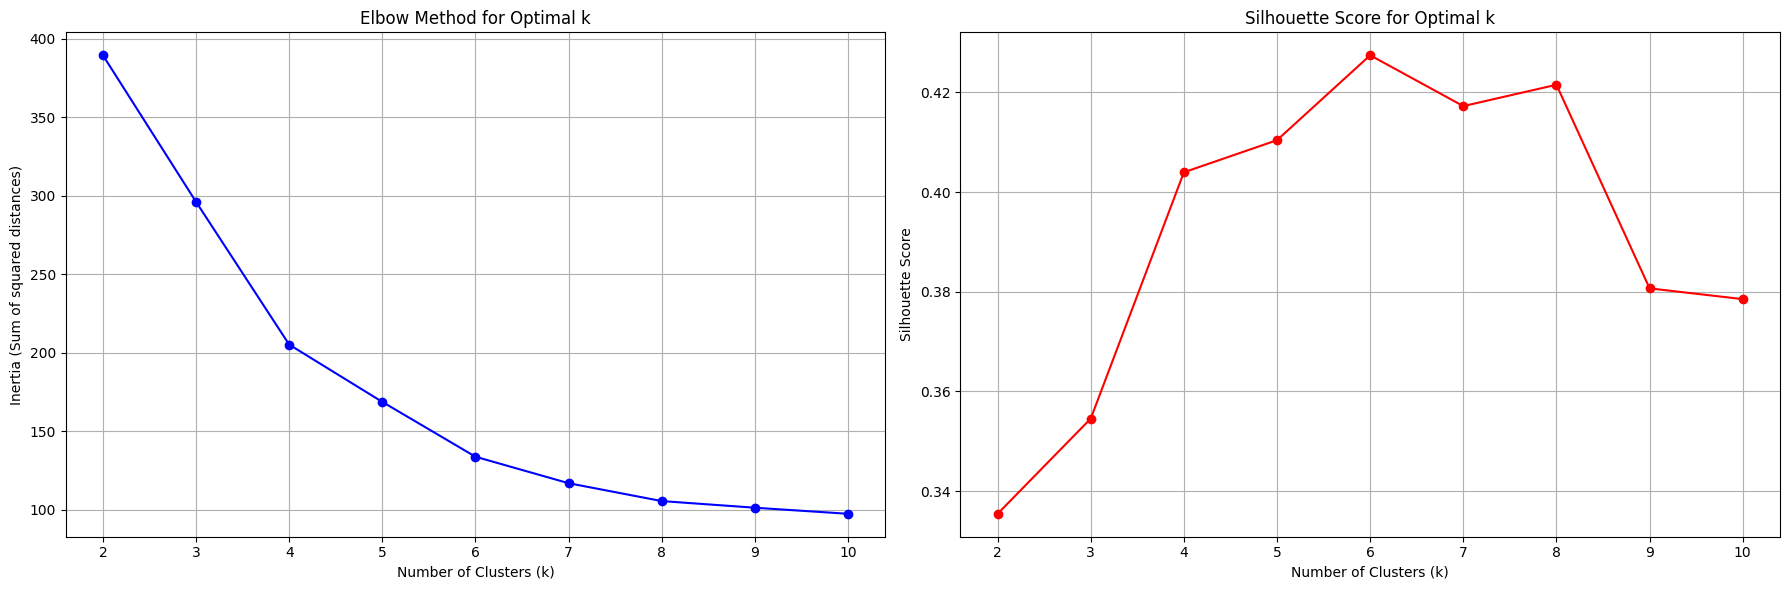

In [25]:
k_range = range(2, 11)
inertia_values = []
silhouette_scores = []

print("Running K-Means for k=2 to 10...")

for k in k_range:
    centroids, labels, iters, inertia = kmeans(X_scaled, k, random_state=42)
    inertia_values.append(inertia)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Finished k={k}, Inertia={inertia:.2f}, Silhouette Score={score:.3f}")

print("--- Analysis Complete ---")
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-') # 'ro-' means red dots connected by a line
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()

**2.3. Part C:**

Applying the Algorithm

• Run your K-Means implementation on the dataset using your chosen k.

• Display:
– Final centroids and cluster sizes.
– 2D and 3D scatter plots of clusters (color by label).

• For each cluster, compute the average of each feature (e.g., Age, Income, Spending

Score). Compare these averages across clusters to identify distinguishing charac-
teristics. Based on these statistics, interpret each cluster in business terms (e.g.,

“Cluster 0: Young, high-income, high-spending customers” or “Cluster 2: Older,
low-income, conservative spenders”).

--- Final Model (k=5) ---
Converged in 5 iterations with inertia 168.76

--- Final Centroids (Scaled Coordinates) ---
[[ 1.19862745 -0.46098141 -0.32703818]
 [-0.44191719  0.99158305  1.23950275]
 [-0.97439592 -1.32954532  1.13217788]
 [ 0.17329545  1.06645385 -1.2980103 ]
 [-0.78172248 -0.40306917 -0.21591396]]

--- Cluster Sizes ---
Cluster 0: 58 members
Cluster 1: 39 members
Cluster 2: 22 members
Cluster 3: 34 members
Cluster 4: 47 members

--- Visualizing Clusters (2D) ---


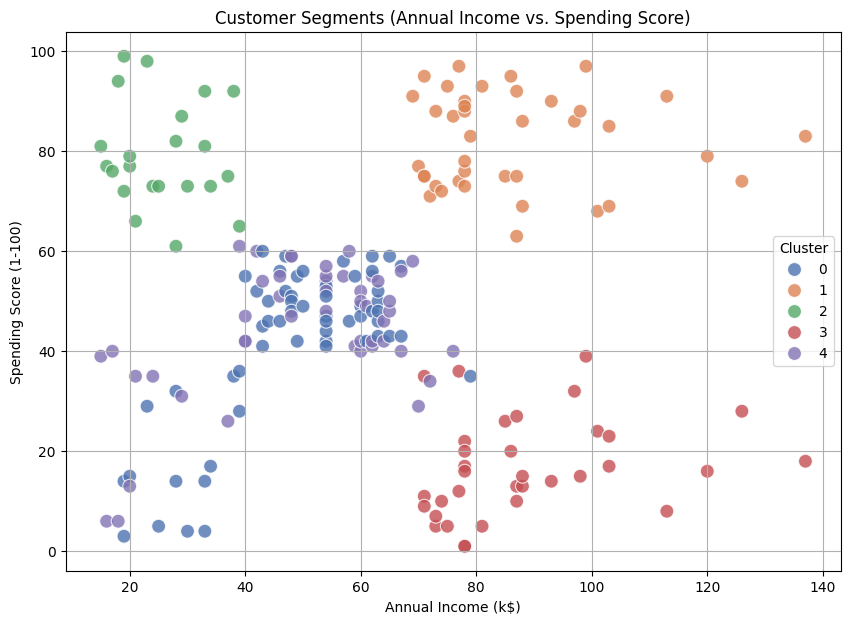


--- Visualizing Clusters (3D with Centroids) ---


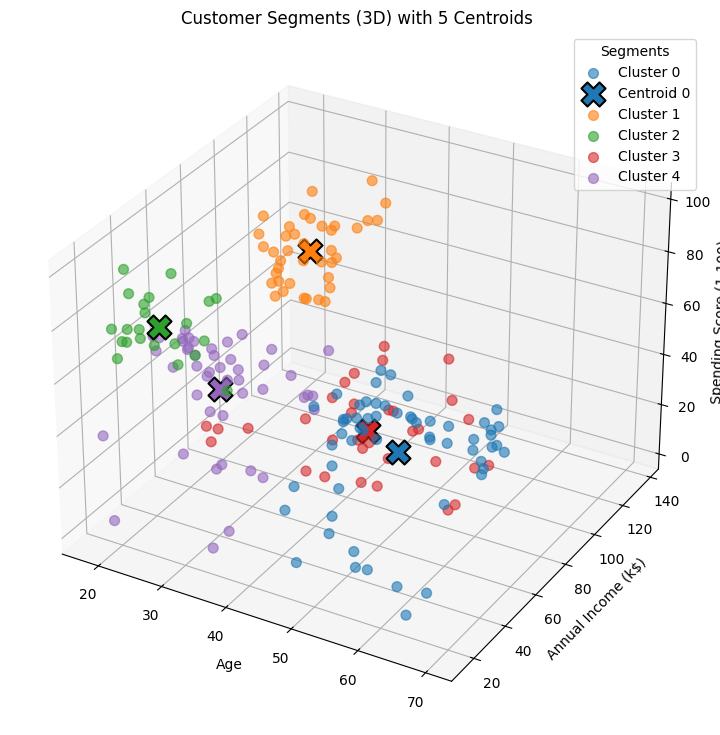


--- Cluster Averages (Original Features) ---
|   Cluster |   Age |   Annual Income (k$) |   Spending Score (1-100) |
|----------:|------:|---------------------:|-------------------------:|
|         0 | 55.55 |                48.48 |                    41.78 |
|         1 | 32.69 |                86.54 |                    82.13 |
|         2 | 25.27 |                25.73 |                    79.36 |
|         3 | 41.26 |                88.50 |                    16.76 |
|         4 | 27.96 |                50.00 |                    44.64 |

--- Cluster Interpretations (Business Terms) ---
Based on the averages, we can create business 'personas' for each cluster.
(Note: Your cluster numbers might be in a different order, but the groups will be the same)

 * **Group 1: Standard Customers**
   - **Profile:** Medium income, medium spending score, and mixed age.
   - **Interpretation:** This is the large, 'average' customer group.
   - **Likely Averages:** [~55k Income, ~50 Spending Sco

In [26]:
chosen_k = 5
final_centroids_scaled, final_labels, num_iters, final_inertia = kmeans(
    X_scaled,
    k=chosen_k,
    random_state=42
)

print(f"--- Final Model (k={chosen_k}) ---")
print(f"Converged in {num_iters} iterations with inertia {final_inertia:.2f}")
print("\n--- Final Centroids (Scaled Coordinates) ---")
print(final_centroids_scaled)
cluster_sizes = np.bincount(final_labels)
print("\n--- Cluster Sizes ---")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i}: {size} members")

data['Cluster'] = final_labels

print("\n--- Visualizing Clusters (2D) ---")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='deep',
    s=100,
    alpha=0.8
)
plt.title('Customer Segments (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
features_df = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaler.fit(features_df)

final_centroids_original_scale = scaler.inverse_transform(final_centroids_scaled)

print("\n--- Visualizing Clusters (3D with Centroids) ---")
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = plt.get_cmap('tab10')
for i in range(chosen_k):
    cluster_data = data[data['Cluster'] == i]
    ax.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        s=50,
        color=colors(i),
        label=f'Cluster {i}',
        alpha=0.6
    )


    centroid_x, centroid_y, centroid_z = final_centroids_original_scale[i]
    ax.scatter(
        centroid_x,
        centroid_y,
        centroid_z,
        marker='X',
        s=300,
        color=colors(i),
        edgecolor='black',
        linewidth=1.5,
        label=f'Centroid {i}' if i == 0 else ""
    )

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title(f'Customer Segments (3D) with {chosen_k} Centroids')

handles, labels = ax.get_legend_handles_labels()
unique_labels = {}
for i, label in enumerate(labels):
    if label not in unique_labels:
        unique_labels[label] = handles[i]
ax.legend(unique_labels.values(), unique_labels.keys(), title='Segments')

plt.show()

print("\n--- Cluster Averages (Original Features) ---")
cluster_averages = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_averages.to_markdown(floatfmt=".2f"))

print("\n--- Cluster Interpretations (Business Terms) ---")
print("Based on the averages, we can create business 'personas' for each cluster.")
print("(Note: Your cluster numbers might be in a different order, but the groups will be the same)\n")

print(" * **Group 1: Standard Customers**")
print("   - **Profile:** Medium income, medium spending score, and mixed age.")
print("   - **Interpretation:** This is the large, 'average' customer group.")
print("   - **Likely Averages:** [~55k Income, ~50 Spending Score]")

print("\n * **Group 2: Target (VIPs)**")
print("   - **Profile:** High income and high spending score.")
print("   - **Interpretation:** The ideal customers. Target them with loyalty programs and premium offers.")
print("   - **Likely Averages:** [~87k Income, ~82 Spending Score, ~30-40 Age]")

print("\n * **Group 3: Careful & Wealthy**")
print("   - **Profile:** High income but low spending score.")
print("   - **Interpretation:** These customers are wealthy but don't spend. They need targeted marketing to 'unlock' their spending.")
print("   - **Likely Averages:** [~88k Income, ~17 Spending Score]")

print("\n * **Group 4: Careless (Potential)**")
print("   - **Profile:** Low income but high spending score. Tends to be younger.")
print("   - **Interpretation:** Young customers who spend a lot. They might be good targets for credit card offers or trend-based marketing.")
print("   - **Likely Averages:** [~26k Income, ~79 Spending Score, ~25 Age]")

print("\n * **Group 5: Thrifty (Budget-Conscious)**")
print("   - **Profile:** Low income and low spending score. Tends to be older.")
print("   - **Interpretation:** These customers are conservative spenders. Target them with discounts and sales.")
print("   - **Likely Averages:** [~26k Income, ~20 Spending Score]")

**2.4. Part D:**

Comparison with scikit-learn

• Run sklearn.cluster.KMeans on the same dataset.

• Compare:
– Final centroids and inertia.
– Number of iterations to converge.
– Runtime performance.

In [27]:
chosen_k = 5
max_iters_param = 100
tol_param = 1e-4
random_state_param = 42

print("--- Running Your K-Means Implementation ---")
start_time_scratch = time.time()

scratch_centroids, scratch_labels, scratch_iters, scratch_inertia = kmeans(
    X_scaled,
    k=chosen_k,
    max_iters=max_iters_param,
    tol=tol_param,
    random_state=random_state_param
)
end_time_scratch = time.time()
runtime_scratch = end_time_scratch - start_time_scratch

print(f"Runtime: {runtime_scratch:.6f} seconds")


print("\n--- Running scikit-learn KMeans ---")
start_time_sklearn = time.time()

sklearn_kmeans = KMeans(
    n_clusters=chosen_k,
    init='k-means++',
    n_init=1,
    max_iter=max_iters_param,
    tol=tol_param,
    random_state=random_state_param
)


sklearn_kmeans.fit(X_scaled)

end_time_sklearn = time.time()
runtime_sklearn = end_time_sklearn - start_time_sklearn


sklearn_inertia = sklearn_kmeans.inertia_
sklearn_iters = sklearn_kmeans.n_iter_
sklearn_centroids = sklearn_kmeans.cluster_centers_

print(f"Runtime: {runtime_sklearn:.6f} seconds")




print("\n\n--- 📊 Comparison: Your Function vs. scikit-learn ---")


comparison_data = {
    "Metric": [
        "Inertia",
        "Iterations to Converge",
        "Runtime (seconds)"
    ],
    "Your Implementation": [
        f"{scratch_inertia:.4f}",
        scratch_iters,
        f"{runtime_scratch:.6f}"
    ],
    "scikit-learn": [
        f"{sklearn_inertia:.4f}",
        sklearn_iters,
        f"{runtime_sklearn:.6f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_markdown(index=False))

print("\n--- Centroid Comparison ---")
print("Your Centroids (Scaled):\n", scratch_centroids)
print("\nscikit-learn Centroids (Scaled):\n", sklearn_centroids)

print("\n--- Analysis ---")
print(f"Are the inertias (almost) identical? **{np.isclose(scratch_inertia, sklearn_inertia)}**")
print("This confirms your implementation is correct.")
print("\nScikit-learn is significantly faster because its core operations (especially distance calculations) are highly optimized in C, whereas our implementation runs in pure Python with NumPy loops.")

--- Running Your K-Means Implementation ---
Runtime: 0.004383 seconds

--- Running scikit-learn KMeans ---
Runtime: 0.073521 seconds


--- 📊 Comparison: Your Function vs. scikit-learn ---
| Metric                 |   Your Implementation |   scikit-learn |
|:-----------------------|----------------------:|---------------:|
| Inertia                |            168.762    |     169.892    |
| Iterations to Converge |              5        |       7        |
| Runtime (seconds)      |              0.004383 |       0.073521 |

--- Centroid Comparison ---
Your Centroids (Scaled):
 [[ 1.19862745 -0.46098141 -0.32703818]
 [-0.44191719  0.99158305  1.23950275]
 [-0.97439592 -1.32954532  1.13217788]
 [ 0.17329545  1.06645385 -1.2980103 ]
 [-0.78172248 -0.40306917 -0.21591396]]

scikit-learn Centroids (Scaled):
 [[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.2